In [25]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Organização das Databases

In [5]:
# Função para agrupar dados. Genero = Masculino
def agruparDadosMasc():
    masc_2015 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2015.csv')
    masc_2016 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2016.csv')
    masc_2017 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2017.csv')
    masc_2018 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2018.csv')
    masc_2019 = pd.read_csv('Data/dados_Tabela 4.1.3.xlsx_2019.csv')
    masc_2020 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2020.csv')
    masc_2021 = pd.read_csv('Data/dados_Tabela 4.1.3.xls_2021.csv')

    join = pd.concat([masc_2015, masc_2016, masc_2017, masc_2018, masc_2019, masc_2020, masc_2021])
    return join

agruparDadosMasc()

,ano,uf,genero,mes,numero
0,2015,Rondônia,Masculino,Janeiro,1
1,2015,Rondônia,Masculino,Fevereiro,0
2,2015,Rondônia,Masculino,Março,1
3,2015,Rondônia,Masculino,Abril,0
4,2015,Rondônia,Masculino,Maio,0
...,...,...,...,...,...
319,2021,Distrito Federal,Masculino,Agosto,11
320,2021,Distrito Federal,Masculino,Setembro,6
321,2021,Distrito Federal,Masculino,Outubro,9
322,2021,Distrito Federal,Masculino,Novembro,6


In [6]:
# Função para agrupar dados. Genero = Feminino
def agruparDadosFem():
    fem_2015 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2015.csv')
    fem_2016 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2016.csv')
    fem_2017 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2017.csv')
    fem_2018 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2018.csv')
    fem_2019 = pd.read_csv('Data/dados_Tabela 4.1.4.xlsx_2019.csv')
    fem_2020 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2020.csv')
    fem_2021 = pd.read_csv('Data/dados_Tabela 4.1.4.xls_2021.csv')

    join = pd.concat([fem_2015, fem_2016, fem_2017, fem_2018, fem_2019, fem_2020, fem_2021])
    return join

agruparDadosFem()

,ano,uf,genero,mes,numero
0,2015,Rondônia,Feminino,Janeiro,2
1,2015,Rondônia,Feminino,Fevereiro,1
2,2015,Rondônia,Feminino,Março,0
3,2015,Rondônia,Feminino,Abril,1
4,2015,Rondônia,Feminino,Maio,0
...,...,...,...,...,...
319,2021,Distrito Federal,Feminino,Agosto,12
320,2021,Distrito Federal,Feminino,Setembro,13
321,2021,Distrito Federal,Feminino,Outubro,15
322,2021,Distrito Federal,Feminino,Novembro,20


In [7]:
# Função para agrupar dados. Genero = Masculino && Feminino
def agruparDadosGerais():
    masc = agruparDadosMasc()
    fem = agruparDadosFem()

    join = pd.concat([masc, fem])
    return join

agruparDadosGerais()

,ano,uf,genero,mes,numero
0,2015,Rondônia,Masculino,Janeiro,1
1,2015,Rondônia,Masculino,Fevereiro,0
2,2015,Rondônia,Masculino,Março,1
3,2015,Rondônia,Masculino,Abril,0
4,2015,Rondônia,Masculino,Maio,0
...,...,...,...,...,...
319,2021,Distrito Federal,Feminino,Agosto,12
320,2021,Distrito Federal,Feminino,Setembro,13
321,2021,Distrito Federal,Feminino,Outubro,15
322,2021,Distrito Federal,Feminino,Novembro,20


In [8]:
# Definindo nome das Variaveis
data_masc = agruparDadosMasc()
data_fem = agruparDadosFem()
data_geral = agruparDadosGerais()

# Limpeza dos Dados e Captação de Insights


Casamentos por Ano

ano
2015    5614
2016    5354
2017    5887
2018    9520
2019    9056
2020    6433
2021    9202
Name: numero, dtype: int64


Text(0, 0.5, 'Número de Casamentos')

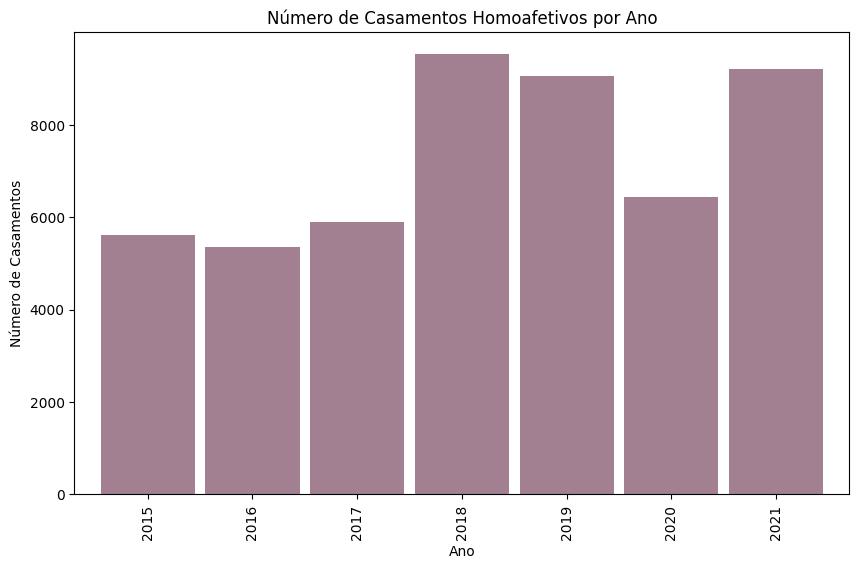

In [9]:
# Soma de Casamentos por ano
casamentos_ano = data_geral.groupby('ano')['numero'].sum()
print(casamentos_ano)


# Grafico de Barras de Casamentos por ano
view_casamentos_ano = casamentos_ano.plot.bar(width = 0.9, color = '#470024', alpha = 0.5, figsize=(10, 6))
view_casamentos_ano.set_title('Número de Casamentos Homoafetivos por Ano')
view_casamentos_ano.set_xlabel('Ano')
view_casamentos_ano.set_ylabel('Número de Casamentos')

Casamentos por Genêro

genero
Feminino     29693
Masculino    21373
Name: numero, dtype: int64


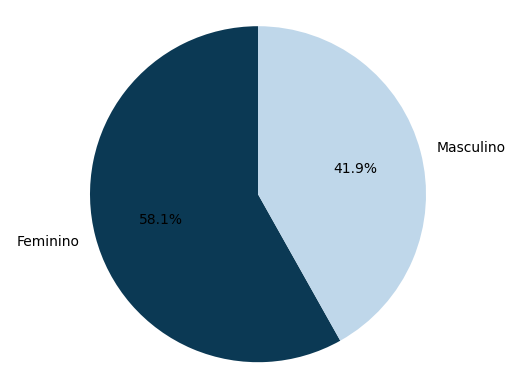

In [10]:
# Soma de Casamentos por Genero
casamentos_genero = data_geral.groupby('genero')['numero'].sum()
print(casamentos_genero)


# Grafico de Pizza de Casamentos por Genero
fig1, view_casamentos_genero = plt.subplots()
view_casamentos_genero.pie(casamentos_genero, labels=('Feminino', 'Masculino'), autopct='%1.1f%%',  startangle=90, colors=('#0B3954', '#BFD7EA'))
view_casamentos_genero.axis('equal')
plt.show()

Casamentos por Estado com base no Último Ano


uf
São Paulo              3319
Minas Gerais            815
Rio de Janeiro          734
Paraná                  486
Santa Catarina          404
Mato Grosso             376
Ceará                   372
Pernambuco              359
Rio Grande do Sul       344
Bahia                   303
Goiás                   255
Distrito Federal        227
Rio Grande do Norte     150
Espírito Santo          144
Pará                    140
Paraíba                 139
Alagoas                 139
Mato Grosso do Sul      136
Maranhão                 86
Amazonas                 67
Rondônia                 49
Roraima                  36
Sergipe                  36
Piauí                    30
Amapá                    27
Tocantins                18
Acre                     11
Name: numero, dtype: int64


Text(0, 0.5, 'Número de Casamentos')

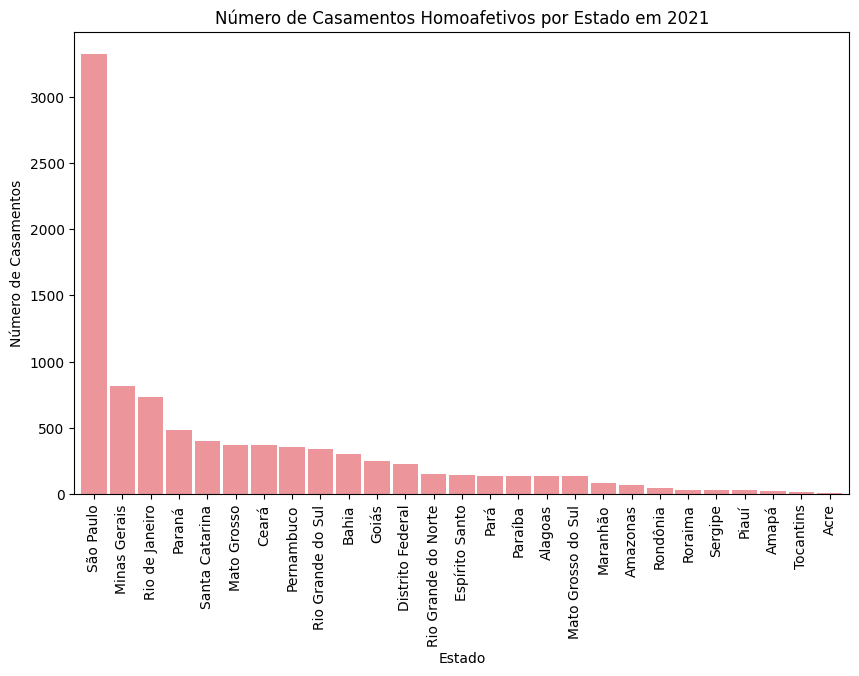

In [11]:
## Numero de Casamentos por Estado no ultimo ano

# Filtrando os Dados por 2021(Ultimo Ano)
data_geral_2021 = data_geral[data_geral['ano'] == 2021]

# Soma dos Casamentos baseados no Ultimo ano
casamentos_estado = data_geral_2021.groupby(['uf'])['numero'].sum()

# Organizando dados dos Casamentos do Maior número de Casamentos para o Menor
casamentos_estado_organizado = casamentos_estado.sort_values(ascending=False)
print(casamentos_estado_organizado)


# Grafico de barras de Casamentos por Estado em 2021
view_casamentos_ano = casamentos_estado_organizado.plot.bar(width = 0.9, color = '#DA2C38', alpha = 0.5, figsize=(10, 6))
view_casamentos_ano.set_title('Número de Casamentos Homoafetivos por Estado em 2021')
view_casamentos_ano.set_xlabel('Estado')
view_casamentos_ano.set_ylabel('Número de Casamentos')

Comparação de Casamentos por Mês dos ùltimos Dois Anos

mes
Janeiro      594
Fevereiro    615
Março        544
Abril        229
Maio         277
Junho        349
Julho        399
Agosto       468
Setembro     593
Outubro      748
Novembro     720
Dezembro     897
Name: numero, dtype: int64
mes
Janeiro       679
Fevereiro     587
Março         632
Abril         555
Maio          591
Junho         674
Julho         767
Agosto        718
Setembro      923
Outubro      1023
Novembro      993
Dezembro     1060
Name: numero, dtype: int64


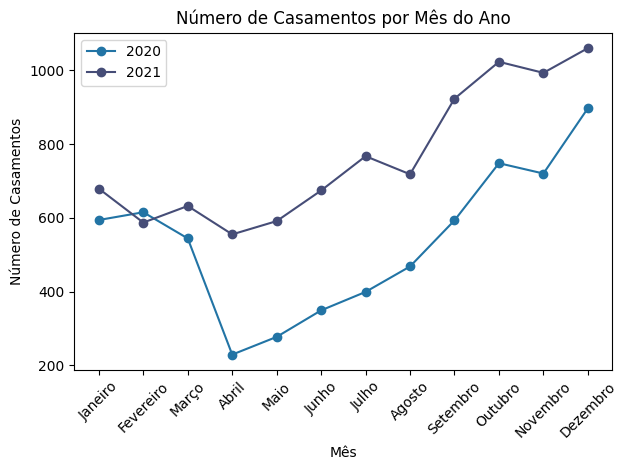

In [12]:
## Numero de Casamentos por Mês do Ano de 2020 e 2021

# Filtrando os Dados por 2020
data_geral_2020 = data_geral[data_geral['ano'] == 2020]

# Soma da Quantidade de Casamentos por Mês durante os anos de 2020 e 2021 
casamentos_mes_2020 = data_geral_2020.groupby(['mes'])['numero'].sum()
casamentos_mes_2021 = data_geral_2021.groupby(['mes'])['numero'].sum()

# Ordenando os Meses
ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Reindexando os meses com base na Ordem 'ordem'
casamentos_mes_ordenado_2020 = casamentos_mes_2020.reindex(ordem)
casamentos_mes_ordenado_2021 = casamentos_mes_2021.reindex(ordem)
print(casamentos_mes_ordenado_2020)
print(casamentos_mes_ordenado_2021)


# Criar o gráfico de comparação em linhas
plt.plot(casamentos_mes_ordenado_2020, marker='o', color='#2274A5', linestyle='-', label='2020')
plt.plot(casamentos_mes_ordenado_2021, marker='o', color='#464D77', linestyle='-', label='2021')

# Adicionar título e rótulos aos eixos
plt.title('Número de Casamentos por Mês do Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Casamentos')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar layout para melhor visualização
plt.show()


# Análise Temporal

In [13]:
## Primeira Limpeza dos Dados

# Setando a variavel que sera utilizada na Análise
data_geral_previsao = data_geral

# Numerando os meses
ordem_meses = {'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5,
    'Junho': 6, 'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10,
    'Novembro': 11, 'Dezembro': 12}

# Adicionando a coluna 'mes_correto' com base na ordem dos meses da variavel acima
data_geral_previsao['mes_correto'] = data_geral_previsao['mes'].map(ordem_meses)

# Adicionando a coluna 'Date' para onde vai ser armazenado os valores que forem convertidos para data
data_geral_previsao['Date'] = pd.to_datetime(data_geral_previsao[['ano', 'mes_correto']].assign(dia=1).rename(columns={'ano': 'year', 'mes_correto': 'month', 'dia': 'day'}))

# Setando a coluna Date como index do DataFrame
data_geral_previsao.set_index('Date', inplace=True)

# Filtrando e Separando pelas 3 Cidades que mais tiveram Casamentos Homoafetivos
previsao_sp = data_geral_previsao.query('uf == "São Paulo"')
previsao_mg = data_geral_previsao.query('uf == "Minas Gerais"')
previsao_rj = data_geral_previsao.query('uf == "Rio de Janeiro"')
print(previsao_sp)
print(previsao_mg)
print(previsao_rj)

             ano         uf     genero        mes  numero  mes_correto
Date                                                                  
2015-01-01  2015  São Paulo  Masculino    Janeiro      69            1
2015-02-01  2015  São Paulo  Masculino  Fevereiro      57            2
2015-03-01  2015  São Paulo  Masculino      Março      68            3
2015-04-01  2015  São Paulo  Masculino      Abril      64            4
2015-05-01  2015  São Paulo  Masculino       Maio      62            5
...          ...        ...        ...        ...     ...          ...
2021-08-01  2021  São Paulo   Feminino     Agosto     159            8
2021-09-01  2021  São Paulo   Feminino   Setembro     204            9
2021-10-01  2021  São Paulo   Feminino    Outubro     236           10
2021-11-01  2021  São Paulo   Feminino   Novembro     246           11
2021-12-01  2021  São Paulo   Feminino   Dezembro     207           12

[168 rows x 6 columns]
             ano            uf     genero        mes 

In [14]:
## Segunda Limpeza de Dados

# Transformando os dados em DataFrames e agrupando eles somento por Data e Mes
previsao_sp_2 = pd.DataFrame(previsao_sp.groupby(['Date', 'mes'])['numero'].sum())
previsao_mg_2 = pd.DataFrame(previsao_mg.groupby(['Date', 'mes'])['numero'].sum())
previsao_rj_2 = pd.DataFrame(previsao_rj.groupby(['Date', 'mes'])['numero'].sum())

# Resetando os Index do DataFrame
previsao_sp_2.reset_index(drop=False, inplace=True)
previsao_mg_2.reset_index(drop=False, inplace=True)
previsao_rj_2.reset_index(drop=False, inplace=True)

# Removendo a coluna mes para melhor organização
previsao_sp_2 = previsao_sp_2.drop(columns='mes')
previsao_mg_2 = previsao_mg_2.drop(columns='mes')
previsao_rj_2 = previsao_rj_2.drop(columns='mes')

# Setando a coluna Date como index do DataFrame novamento
previsao_sp_2.set_index('Date', inplace=True)
previsao_mg_2.set_index('Date', inplace=True)
previsao_rj_2.set_index('Date', inplace=True)

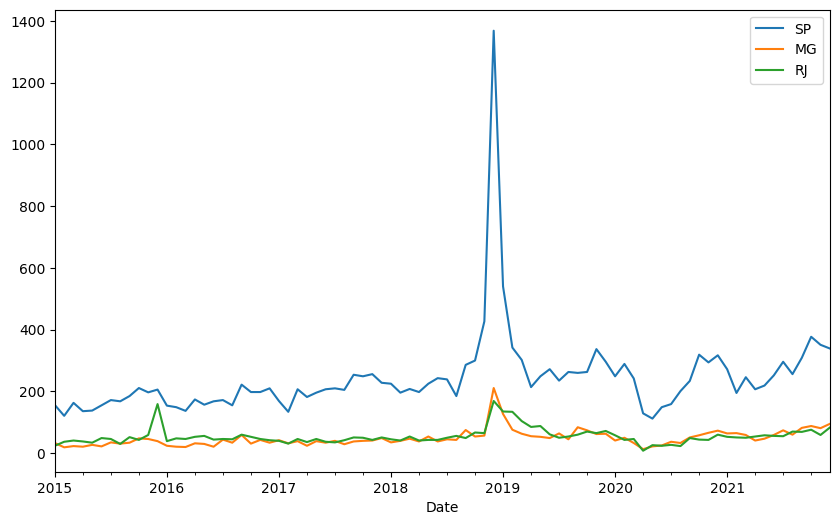

In [15]:
## Visualização dos dados ate o momento

# Grafico de Linhas com os dados dos 3 Estados
previsao_sp_2['numero'].plot(figsize=(10, 6))
previsao_mg_2['numero'].plot(figsize=(10, 6))
previsao_rj_2['numero'].plot(figsize=(10, 6))
plt.legend(['SP', 'MG', 'RJ'])

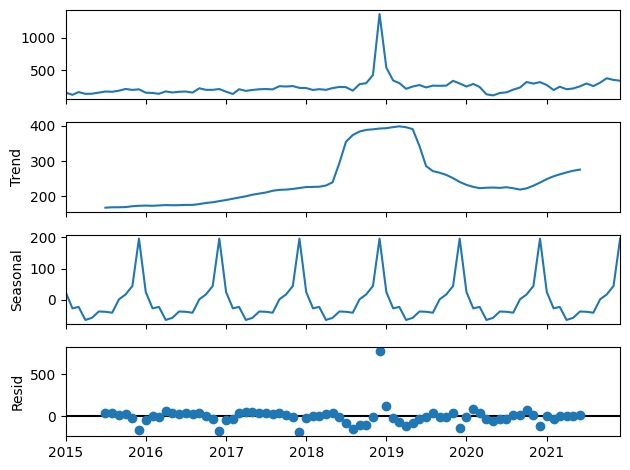

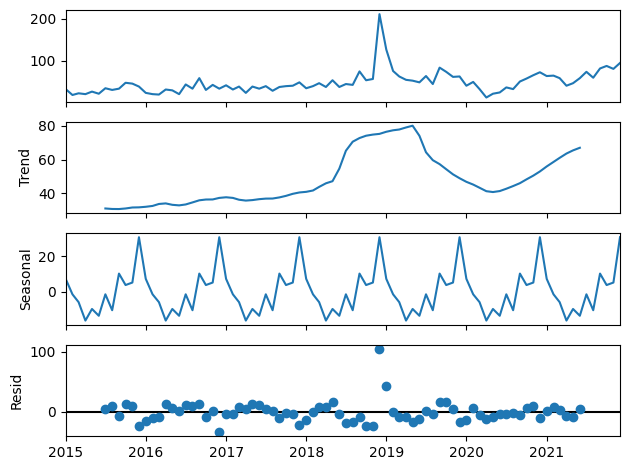

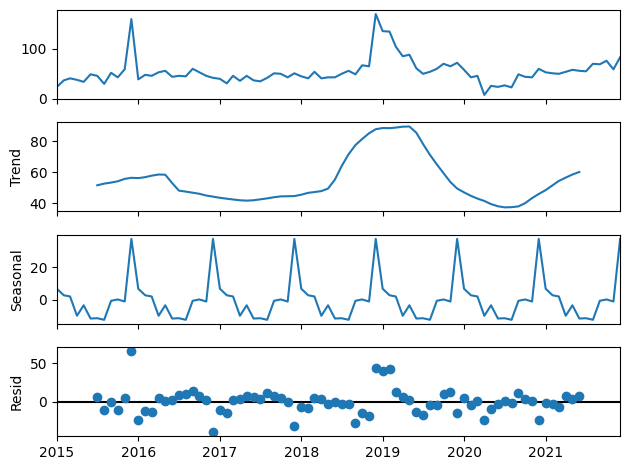

In [16]:
## Decompondo a serie temporal em tendência, sazonalidade e ruído
resultado_sp = seasonal_decompose(previsao_sp_2)
resultado_mg = seasonal_decompose(previsao_mg_2)
resultado_rj = seasonal_decompose(previsao_rj_2)

# Plotando o Grafico 
resultado_sp.plot()
resultado_mg.plot()
resultado_rj.plot()

# Exibindo o Grafico
plt.show()

Previsões com ARIMA

In [17]:
# Fazendo uma busca para achar o melhor modelo ARIMA que se encaixe com a DataBase 'previsao_sp_2'
# Estado de São Paulo
fit_arima_sp = auto_arima(previsao_sp_2, d=1, start_p=1, start_q=1, mas_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=1042.198, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1019.939, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=1037.944, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=1015.783, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=1020.151, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=1015.022, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=1018.313, Time=0.24 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=0.64 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=1016.612, Time=0.40 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=0.43 sec
 A

In [18]:
# Fazendo uma busca para achar o melhor modelo ARIMA que se encaixe com a DataBase 'previsao_mg_2'
# Estado de Minas Gerais
fit_arima_mg = auto_arima(previsao_mg_2, d=1, start_p=1, start_q=1, mas_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=774.963, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=737.497, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=770.694, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=733.264, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=735.910, Time=0.43 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=730.532, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=733.687, Time=0.08 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=0.57 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=731.772, Time=0.22 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=1.20 sec
 ARIMA(1,1

In [19]:
# Fazendo uma busca para achar o melhor modelo ARIMA que se encaixe com a DataBase 'previsao_rj_2'
# Estado do Rio de Janeiro
fit_arima_rj = auto_arima(previsao_rj_2, d=1, start_p=1, start_q=1, mas_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=772.612, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=723.967, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=762.925, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=722.111, Time=0.07 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=732.322, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=724.069, Time=0.41 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=723.995, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=723.051, Time=0.08 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(2,1,0)[6] intercept   : AIC=724.103, Time=0.13 sec

Best model:  ARIMA(1,1,0)(2,1,0)[6]          
Total fit time: 5.06

In [21]:
# AJustando modelos SARIMAX
model_sp = SARIMAX(previsao_sp_2, order=(2,1,0), seasonal_order=(2, 1, 0, 6))
model_mg = SARIMAX(previsao_mg_2, order=(2,1,0), seasonal_order=(2, 1, 0, 6))
model_rj = SARIMAX(previsao_rj_2, order=(1,1,0), seasonal_order=(2, 1, 0, 6))

# Vendo quais parametros se ajustam melhor aos dados
resultado_sarimax_sp = model_sp.fit()
resultado_sarimax_mg = model_mg.fit()
resultado_sarimax_rj = model_rj.fit()

c:\Users\cauac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\cauac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\cauac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\cauac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\cauac\AppData\Local\Programs\Python\Python312\L

In [22]:
# Usando o Forecast para fazer as previsões dos proximos 24 meses
forecast_sp = resultado_sarimax_sp.get_forecast(steps=24)
forecast_mg = resultado_sarimax_mg.get_forecast(steps=24)
forecast_rj = resultado_sarimax_rj.get_forecast(steps=24)

# Usando o 'predicted_mean' os valores medios do futuro
forecast_medio_sp = forecast_sp.predicted_mean
forecast_medio_mg = forecast_mg.predicted_mean
forecast_medio_rj = forecast_rj.predicted_mean

In [24]:
# Calculando intervalos de confiança para o modelo
intervalo_confianca_forecast_sp = forecast_sp.conf_int()
intervalo_confianca_forecast_mg = forecast_mg.conf_int()
intervalo_confianca_forecast_rj = forecast_rj.conf_int()

# Selecionando todas as linhas da primeira coluna dos DataFrames
intervalo_abaixo_foreSP = intervalo_confianca_forecast_sp.iloc[:,0]
intervalo_abaixo_foreMG = intervalo_confianca_forecast_mg.iloc[:,0]
intervalo_abaixo_foreRJ = intervalo_confianca_forecast_rj.iloc[:,0]
# Selecionando todas as linhas da segunda coluna dos DataFrames
intervalo_acima_foreSP = intervalo_confianca_forecast_sp.iloc[:,1]
intervalo_acima_foreMG = intervalo_confianca_forecast_mg.iloc[:,1]
intervalo_acima_foreRJ = intervalo_confianca_forecast_rj.iloc[:,1]

print(f'São Paulo: ', intervalo_abaixo_foreSP[0], intervalo_acima_foreSP[0])
print(f'Minas Gerais: ', intervalo_abaixo_foreMG[0], intervalo_acima_foreMG[0])
print(f'Rio de Janeiro: ', intervalo_abaixo_foreRJ[0], intervalo_acima_foreRJ[0])


São Paulo:  40.42568660046123 677.8607454980993
Minas Gerais:  47.88219636714107 147.2756730978845
Rio de Janeiro:  26.10806638764322 121.37532013987007


C:\Users\cauac\AppData\Local\Temp\ipykernel_1084\4035264798.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'São Paulo: ', intervalo_abaixo_foreSP[0], intervalo_acima_foreSP[0])
C:\Users\cauac\AppData\Local\Temp\ipykernel_1084\4035264798.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Minas Gerais: ', intervalo_abaixo_foreMG[0], intervalo_acima_foreMG[0])
C:\Users\cauac\AppData\Local\Temp\ipykernel_1084\4035264798.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

In [26]:
# Pegando o indice da variavel 'forecast_medio_estado' e transformando em um array
datas_forecast_sp = np.asarray(forecast_medio_sp.index)
datas_forecast_mg = np.asarray(forecast_medio_mg.index)
datas_forecast_rj = np.asarray(forecast_medio_rj.index)

# Pegando o indice da variavel 'previsao_estado' e transformando em um array
dates_sp = np.asarray(previsao_sp_2.index)
dates_mg = np.asarray(previsao_mg_2.index)
dates_rj = np.asarray(previsao_rj_2.index)

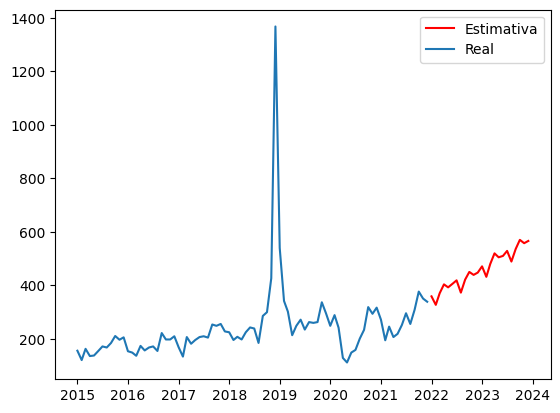

In [33]:
# Plotando Grafico de linha com os dados atuais mais a estimativa para daqui 2 Anos
plt.plot(datas_forecast_sp, forecast_medio_sp.values, color='red', label='Estimativa')
plt.plot(dates_sp, previsao_sp_2.values, label='Real')
plt.legend()
plt.show()

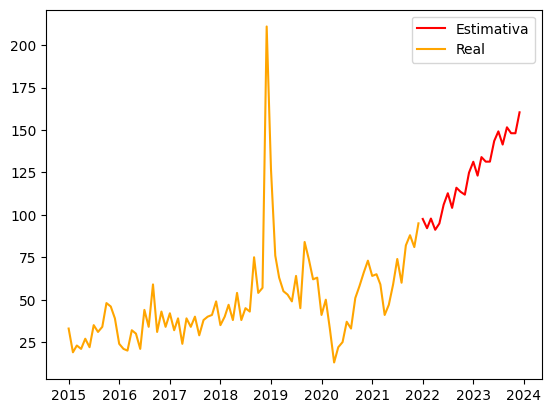

In [34]:
# Plotando Grafico de linha com os dados atuais mais a estimativa para daqui 2 Anos
plt.plot(datas_forecast_mg, forecast_medio_mg.values, color='red', label='Estimativa')
plt.plot(dates_mg, previsao_mg_2.values, color='orange', label='Real')
plt.legend()
plt.show()

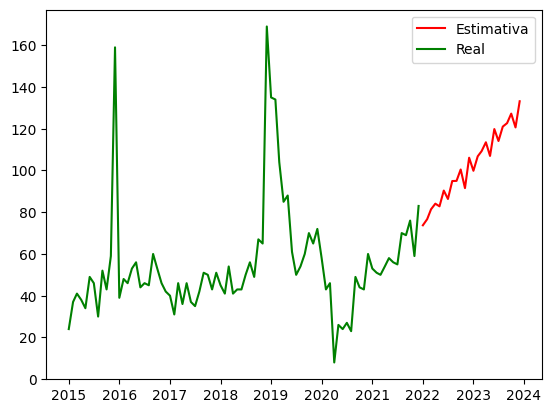

In [35]:
# Plotando Grafico de linha com os dados atuais mais a estimativa para daqui 2 Anos
plt.plot(datas_forecast_rj, forecast_medio_rj.values, color='red', label='Estimativa')
plt.plot(dates_rj, previsao_rj_2.values, color='green', label='Real')
plt.legend()
plt.show()